# Практические особенности работы с линейными моделями

# Семинар 01

## Нормализация данных

Мы уже обсудили, зачем нужна нормализация данных для линейной модели. В данном разделе мы обсудим виды нормализации более подробно.

Загрузим датасет с образцами здоровой и раковой ткани. Датасет состоит из 569 примеров, где каждой строчке из 30 признаков соответствует класс `1` злокачественной (*malignant*) или `0` доброкачественной (*benign*) ткани. Задача состоит в том, чтобы по 30-ти признакам обучить модель определять тип ткани (злокачественная или доброкачественная).


In [ ]:
import sklearn.datasets

cancer = sklearn.datasets.load_breast_cancer()  # load data

x = cancer.data  # features
y = cancer.target  # labels(classes)
print(f"x shape: {x.shape}, y shape: {y.shape}")
print(f"x[0]: \n {x[0]}")
print(f"y[0]: \n {y[0]}")

x shape: (569, 30), y shape: (569,)
x[0]: 
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
y[0]: 
 0


То же самое, но в виде графика. Видно, что у фич совершенно разные диапазоны  значений.

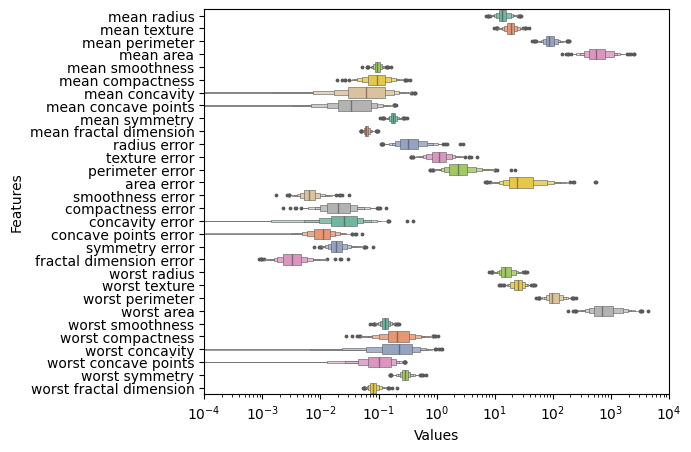

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 5))
ax = sns.boxenplot(
    data=cancer_df,
    orient="h",
    palette="Set2",
    linewidth=0.4,
    flier_kws={"marker": "o", "s": 3},
    line_kws={"linewidth": 1},
)
ax.set(xscale="log", xlim=(1e-4, 1e4), xlabel="Values", ylabel="Features")
plt.show()

Линейная модель представляет собой **сумму взвешенных признаков**. Если мы приведем признаки к **единому масштабу**, мы сможем **оценить их вклад в модель** по значениям весов. Кроме того, работать с признаками в одном диапазоне вычислительно удобно. Для этого будем использовать нормализацию.


### Выбор Scaler

**Нормализацией** называется процедура приведения входных данных к **общим значениям математических статистик**.

Нормализация строит **взаимно однозначное соответствие** между некоторыми размерными величинами (которые измеряются в метрах, килограммах, годах и т. п.) и их безразмерными аналогами. Исходные значения **можно восстановить**, зная статистики оригинальных данных и правило, по которому делалась нормализация.  


Часто используют следующие варианты нормализации:  **`MinMaxScaler`**, **`StandardScaler`**, **`RobustScaler`**.

Идея **`MinMaxScaler`** заключается в том, что он преобразует данные из имеющегося диапазона значений в диапазон от $0$ до $1$. Может быть полезно, если нужно выполнить преобразование, в котором отрицательные значения не допускаются (например, масштабирование RGB пикселей).

$$\large z_i=\frac{X_i-X_{min}}{X_{max}-X_{min}},$$

где $z_i$ — масштабированное значение, $X_i$ — текущее значение, $X_{min}$ и $X_{max}$ — минимальное и максимальное значения имеющихся данных.

Идея **`StandardScaler`** заключается в том, что он преобразует данные таким образом, что распределение будет иметь среднее значение $0$ и стандартное отклонение $1$. Большинство значений будет находиться в диапазоне от $-1$ до $1$. Это стандартная трансформация, и она применима во многих ситуациях.

$$\large z_i=\frac{X_i-u}{s},$$

где $u$ — среднее значение (или $0$ при `with_mean=False`), $s$ — стандартное отклонение (или $0$ при `with_std=False`).

И `StandardScaler`, и `MinMaxScaler` чувствительны к наличию выбросов. **`RobustScaler`** использует медиану и основан на *процентилях*. k-й процентиль — это величина, равная или не превосходящая k процентов чисел во всём имеющемся распределении. Например, 50-й процентиль (медиана) распределения таков, что 50% чисел из распределения не меньше данного числа.

Соответственно, `RobustScaler` не зависит от небольшого числа очень больших предельных выбросов (outliers). Следовательно, результирующий диапазон преобразованных значений признаков больше, чем для предыдущих скэйлеров и, что более важно, примерно одинаков.

$$\large z_i=\frac{X_i-X_{median}}{IQR},$$

где $X_{median}$ — значение медианы, $IQR$ — межквартильный диапазон, равный разнице между 75-ым и 25-ым процентилями.

Сравним `MinMaxScaler`, `StandardScaler`, `RobustScaler` для случайного набора признаков.

In [ ]:
import random

random.seed(0)
random_names = random.sample(list(cancer.feature_names), 8)
cut_df = cancer_df[random_names]

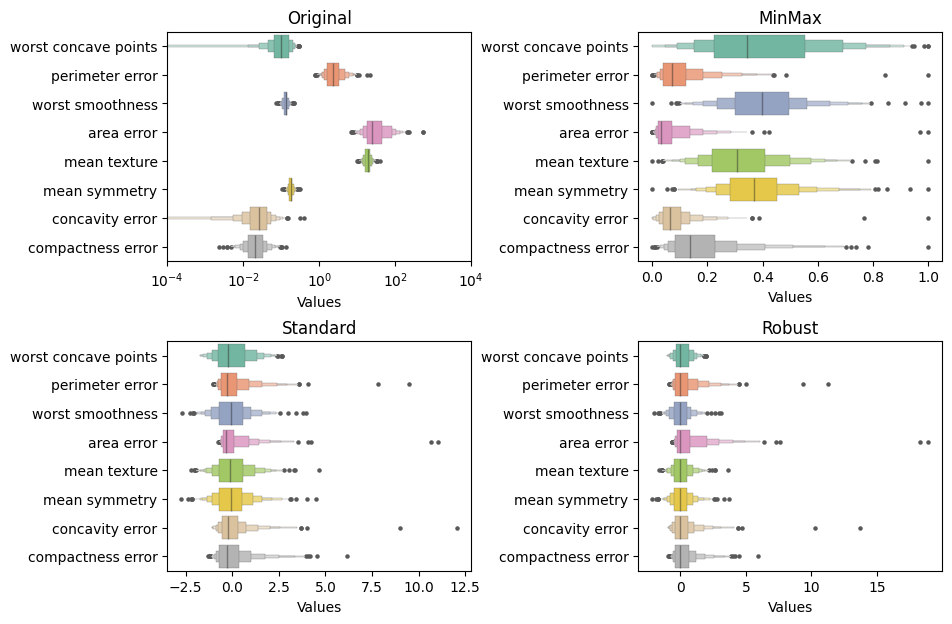

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


def plot_norm(df, ax, title):
    sns.boxenplot(
        df,
        orient="h",
        palette="Set2",
        ax=ax,
        linewidth=0.2,
        flier_kws={"marker": "o", "s": 5},
        line_kws={"linewidth": 1},
    )
    ax.set(xlabel="Values", title=title)


fig, axs = plt.subplots(2, 2, figsize=(10, 7))

plot_norm(cut_df, axs[0][0], "Original")
axs[0][0].set(xscale="log", xlim=(1e-4, 1e4))

min_max_x = MinMaxScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(min_max_x, columns=random_names), axs[0][1], "MinMax")

std_x = StandardScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(std_x, columns=random_names), axs[1][0], "Standard")

rob_x = RobustScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(rob_x, columns=random_names), axs[1][1], "Robust")

plt.subplots_adjust(wspace=0.55, hspace=0.35)

plt.show()

Перед выбором нормализации важно разобраться с природой выбросов. Для этого на выбросы нужно посмотреть с точки зрения эксперта и попробовать определить, являются ли выбросы ошибкой при сборе данных или редкими случаями, которые необходимо сохранить.

Мы не являемся экспертами в медицине и мало знаем о данных, поэтому будем считать, что наши признаки имеют распределение, близкое к нормальному. Поэтому мы будем использовать `StandardScaler`. `StandardScaler` часто используют как нормировку по умолчанию.

In [ ]:
x_norm = StandardScaler().fit_transform(cancer_df)  # scaled data

Видим, что они стали намного более сравнимы между собой.

In [ ]:
pd.DataFrame(x_norm, columns=cancer.feature_names).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


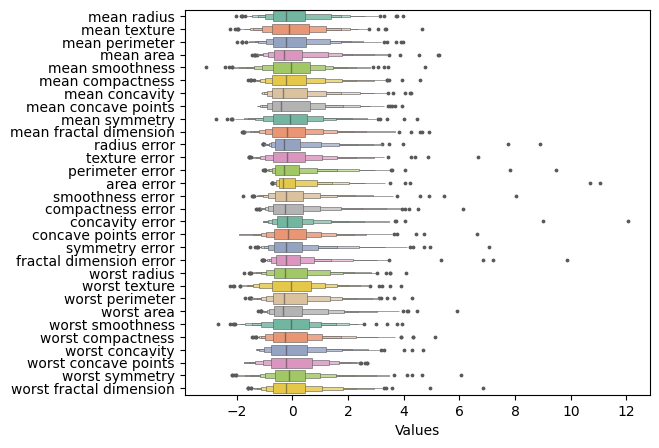

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.boxenplot(
    data=pd.DataFrame(x_norm, columns=cancer.feature_names),
    orient="h",
    palette="Set2",
    linewidth=0.4,
    flier_kws={"marker": "o", "s": 3},
    line_kws={"linewidth": 1},
)
ax.set(xlabel="Values")
plt.show()